Task 5 was to test the hypothesis that Rav is approximately equal to the square root of the number of steps in the random walk. This was done by calculating 100 walks for a step size and then taking the average of the scalar distance. This was then repeated for a number of different step sizes and then plotted against the expected value of root N.

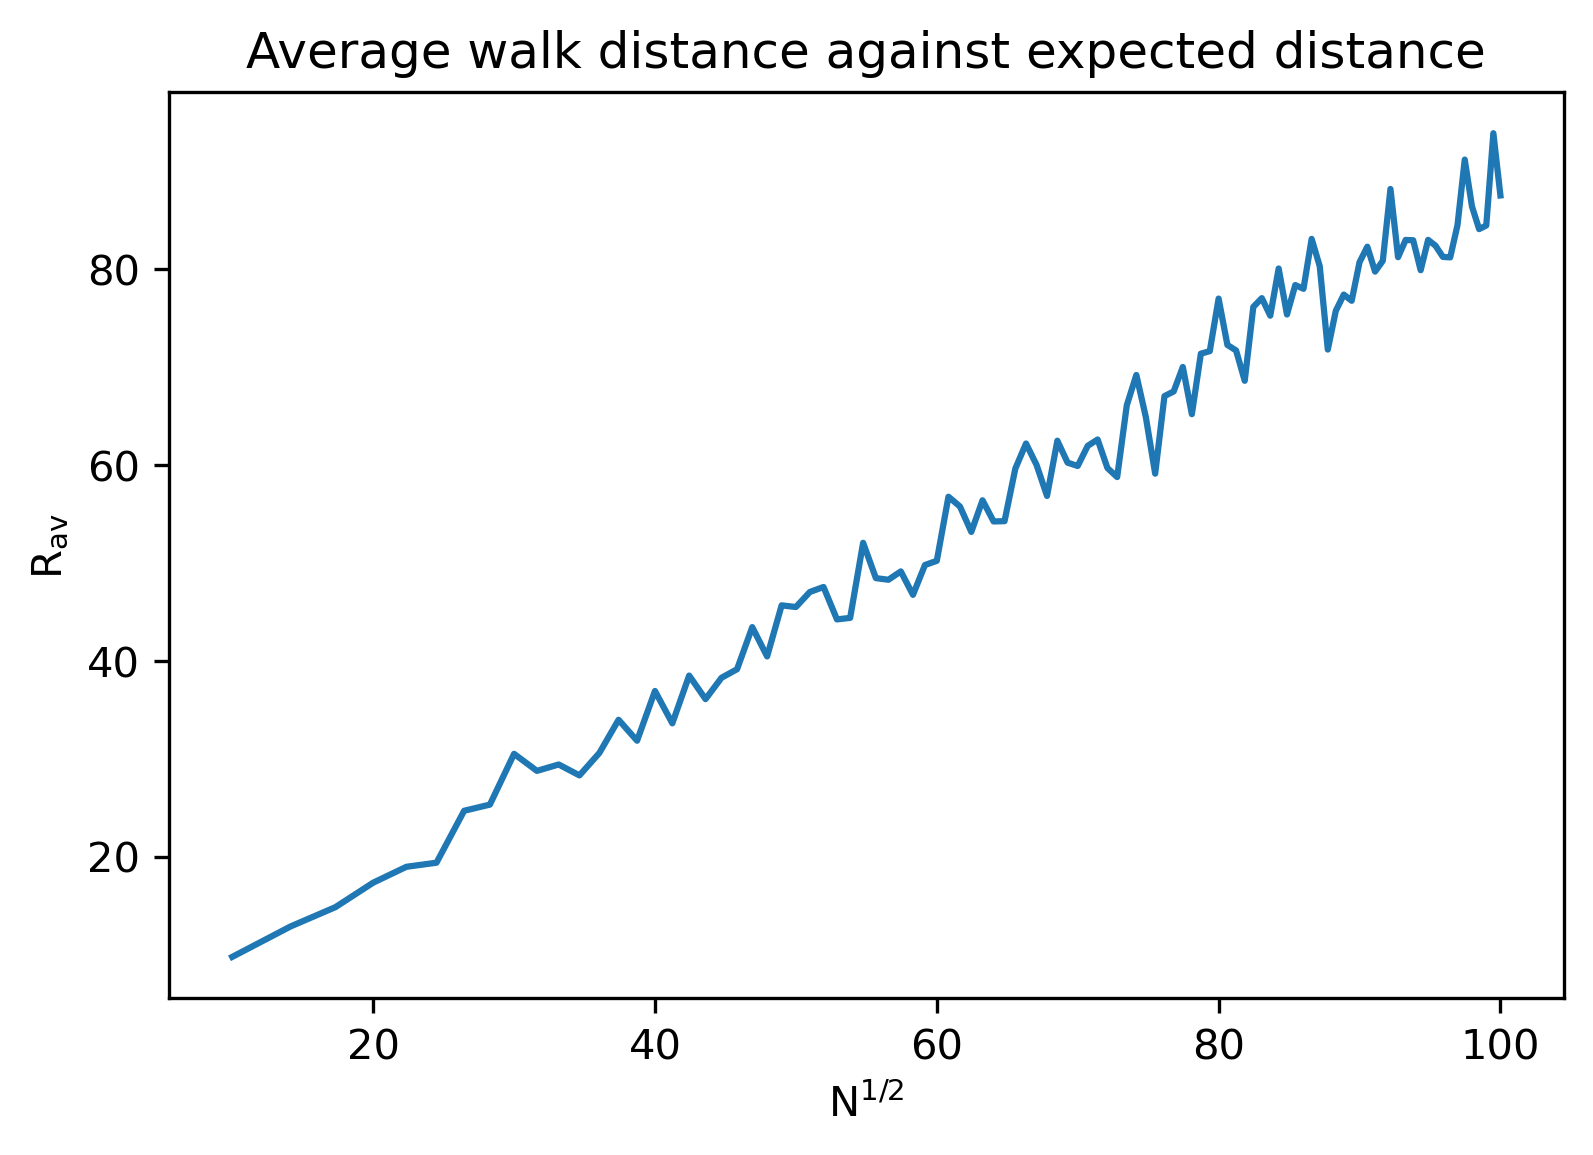

runtime: 144.71395254135132 seconds


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import time as t

start = t.time()#start time counter

plt.rcParams['figure.dpi'] = 300#increases resolution of matplotlib plots


class ranWalk():
    
    def __init__(self,steps):#initialisation parameters of the class
        self.steps = steps#number of steps
        
    def genWalk(self):
        self.X = []#position list for x coords
        self.Y = []#position list for y coords
        self.xc = 0#starting position in x
        self.yc = 0#starting position in y
        self.X.append(self.xc)#appending start positions to position lists
        self.Y.append(self.yc)
        for i in range(0,self.steps):
            self.xa = (random.random()-0.5)*2#generates random step size in x direction
            self.ya = (random.random()-0.5)*2#generates random step size in y direction
            self.normalise = np.sqrt(((self.xa)**2) + ((self.ya)**2))#normalisation factor, for equal step size magnitude
            self.xc += self.xa/self.normalise#applying normalisation factor to x step
            self.yc += self.ya/self.normalise#applying normalisation factor to y step
            self.X.append(self.xc)#appends x position to position list
            self.Y.append(self.yc)#appends y position to position list
        return self.X,self.Y
    
    """
    Generates a walk with equal step sizes in pseudo
    random directions. Magnitude of all step sizes is 1.
    """
        
    def scalarDist(self):
        dy = (self.Y[-1]-self.Y[0])**2#last value in y position array minus first value
        dx = (self.X[-1]-self.X[0])**2#last value in x position array minus first value
        self.Rav = np.sqrt(dy + dx)
        return self.Rav
    
    """
    Above function calculates the scalar distance 
    from the starting position for a random walk.
    Uses equation from session 4 lecture notes on learn.
    """
    
    def plotWalk(self):
        plt.plot(self.X,self.Y, 'g--')
        plt.show()
        
    """
    Above function plots the walk
    """
        
    def loopWalk(self,walks):
        self.walks = walks#number of walks
        self.Rtot = 0#scalar distance total
        for i in range(0,self.walks):
            ranWalk.genWalk(self)#generates the walk
            foo = ranWalk.scalarDist(self)#scalar distance for the walk just generated
            self.Rtot += foo#added to total
            #ranWalk.plotWalk(self)#testing if genWalk is being run
        return (self.Rtot/self.walks)#average scalar distance returned
    
    """
    Above function runs generates a walk of self.steps step size,
    self.walks number of times. It also gets the scalar
    distance for each walk and divides that by the number of walks
    generated to give the average scalar distance for walks
    from a set position of a set step size. In theory this average
    should be equal to the square root of the step size.
    """
    
    
def stepChange(u,l,i):#upper step size, lower step size, increment size
    X1 = []
    Y1 = []
    while l<=u:
        mwalk = ranWalk(l)#creates ranWalk object
        foom = mwalk.loopWalk(100)#calls loopWalk to generate 100 walks
        Y1.append(foom)#stores actual value of Rav
        X1.append(np.sqrt(l))#stores expected value of Rav
        l += i#increases step size of walk for next loop by i
        #print(l)
    plt.title("Average walk distance against expected distance")
    plt.xlabel("$\mathregular{N^{1/2}}$")
    plt.ylabel("$\mathregular{R_{av}}$")
    plt.plot(X1,Y1)
    plt.show()
    #print(list(zip(X1, Y1)))
    """
    Plots average scalar distance for walks from u steps
    to l steps in increments of 100 steps. It then plots
    the program output for Rav against the expected value
    of Rav.
    """
    
stepChange(10000,100,100)#executes program
end = t.time()#end time counter
print("runtime: %s seconds" % (end - start))#program execution time

As shown in the graph above, Rav is approximately equal to the root of the number of steps(rough x=y trend). The accuracy of this could be improved by increasing th value used in stepChange when calling loopWalk, but this would also significantly slow down the program. Where its already had a runtime of over 2 minutes. Higher values in loopWalk would therefore be impractical.